# Heart Attack Prediction and Risk Identification

### Introduction:

This document presents an analysis and prediction of heart attack data, focusing on identifying the risk of heart attacks among elderly individuals in advance based on certain features. It comprises various sections, each addressing relevant subtasks for building predictive models.

### Libraries Import and Data Load:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')
# Set the style of the plot
sns.set(style="whitegrid")

D:\anaconda\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [2]:
data_v1 = pd.read_csv("heart_attack_prediction_dataset.csv")

### Exploratory Data Analysis:

In this phase, we thoroughly examine the dataset's features to understand its structure and characteristics. We identify and address any inconsistencies or anomalies through data cleaning. Through techniques like summary statistics and visualization, we aim to uncover patterns and trends. This phase ensures data reliability for further analysis and modeling.

In [3]:
data_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

**No missing values.**

In [4]:
data_v1.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


#### Filter data by age:

We filter data by age and considering 40 as the minimum.

In [5]:
data_v1 = data_v1[data_v1.Age >= 40]

Splitting **"Blood Pressure"** into **"Systolic"** and **"Diastolic"**

In [6]:
# Splitting the blood pressure column
data_v1[['Systolic', 'Diastolic']] = data_v1['Blood Pressure'].str.split('/', expand=True)

# dropping blood pressure column
data_v1.drop("Blood Pressure", axis = 1, inplace = True)
# Converting to numerical format
data_v1['Systolic'] = pd.to_numeric(data_v1['Systolic'])
data_v1['Diastolic'] = pd.to_numeric(data_v1['Diastolic'])

#### Data Exploration:

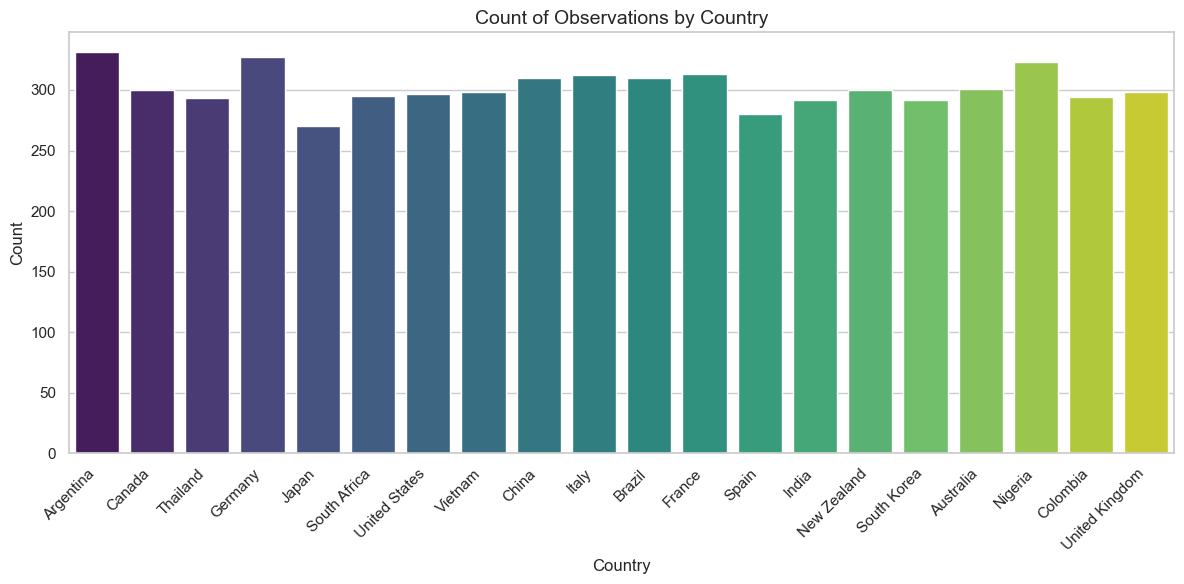

In [7]:
# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=data_v1, palette='viridis')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Observations by Country', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

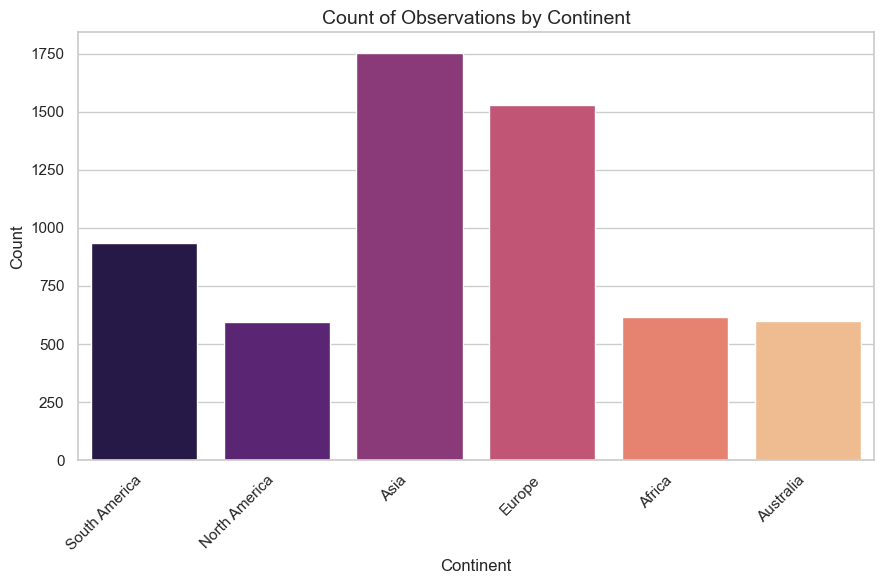

In [8]:
# Plot using seaborn
plt.figure(figsize=(9, 6))
sns.countplot(x='Continent', data=data_v1, palette='magma')
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Observations by Continent', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The data is distributed well geographically. It is collected from different country all over the world. let's explore the distributions of the continuous features and check for outliers.

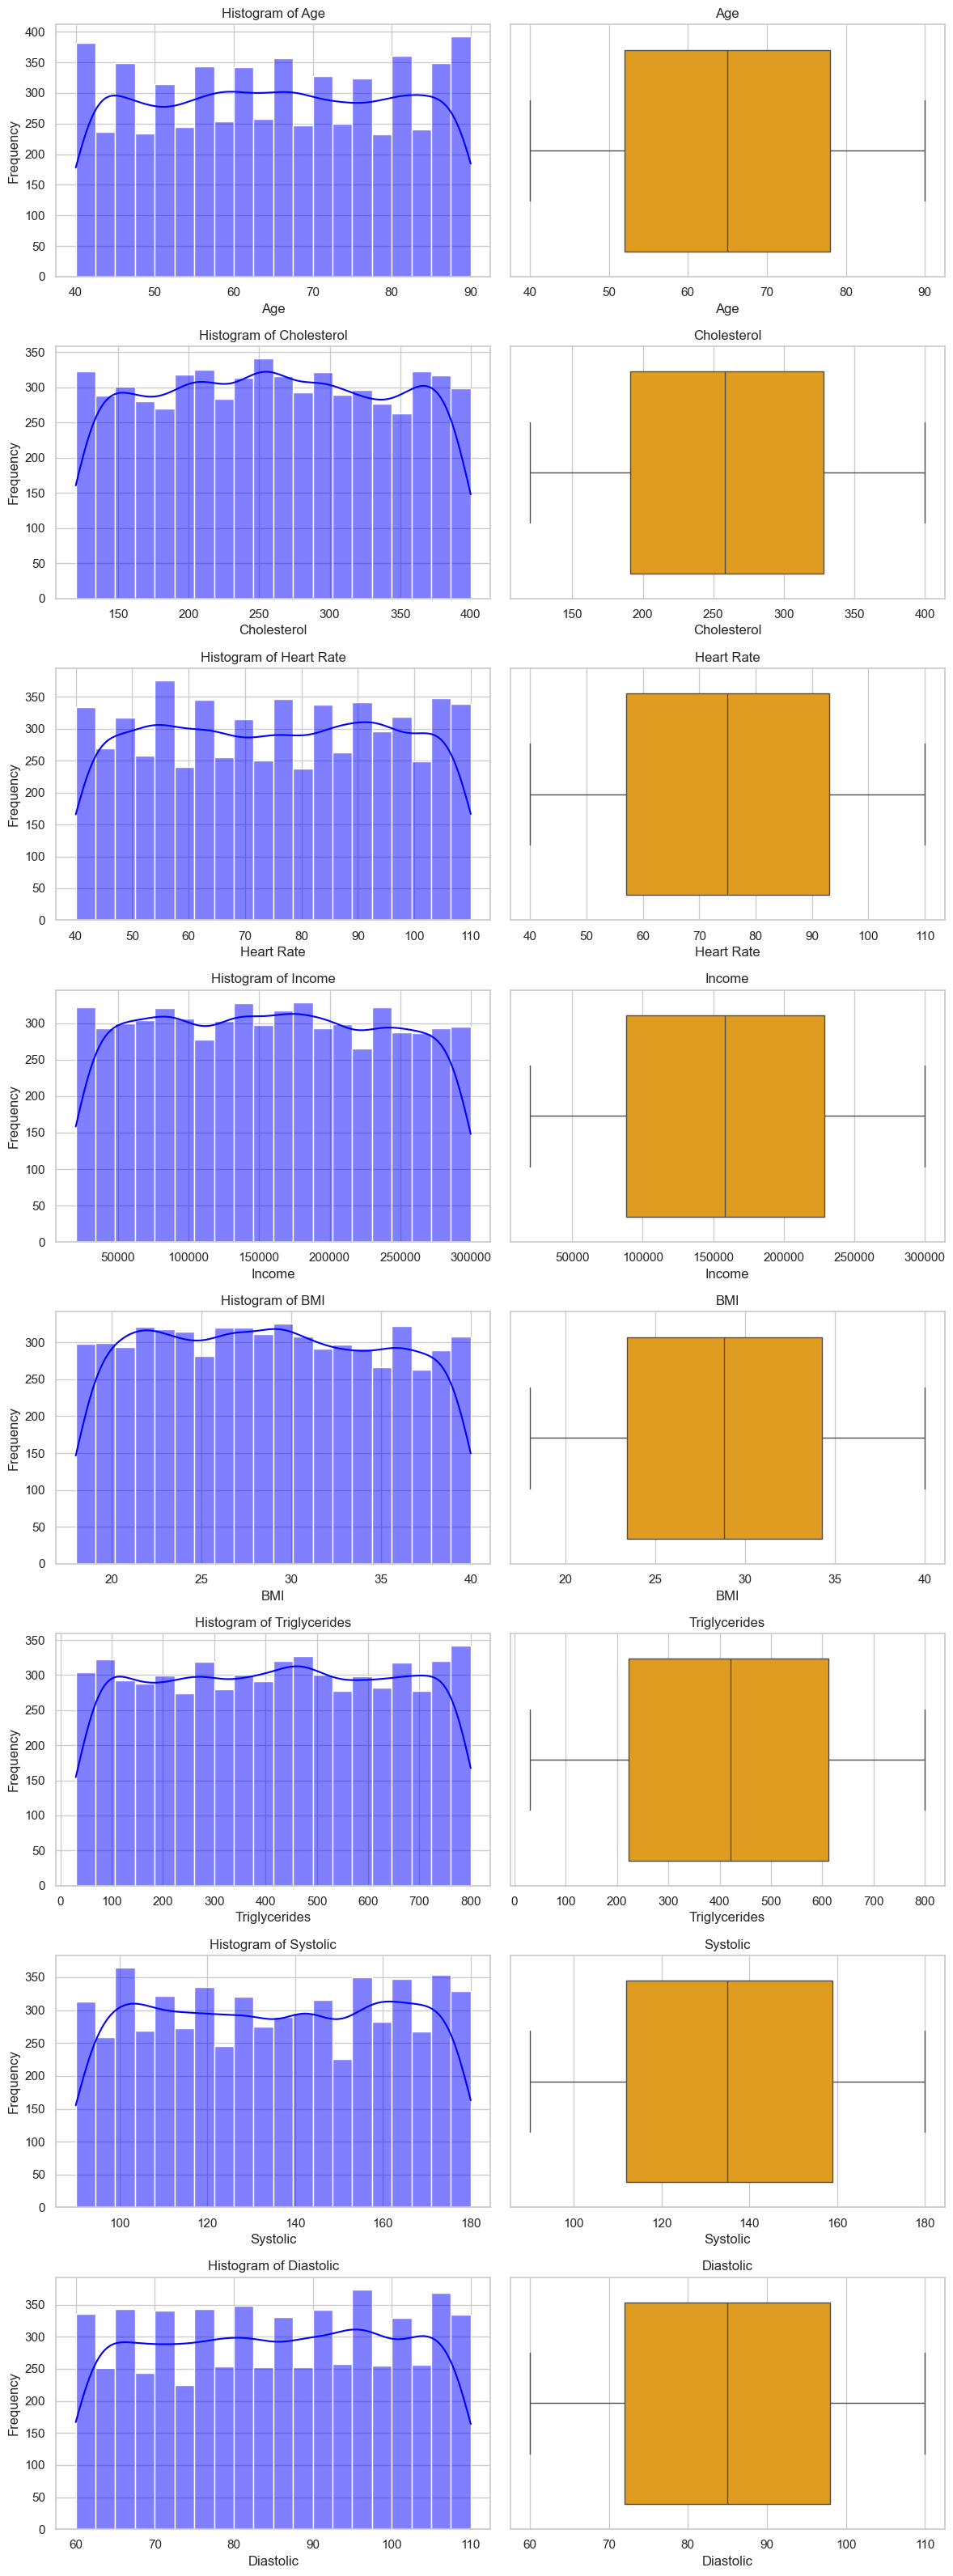

In [9]:
# features to plot
to_plot = ['Age', 'Cholesterol', 'Heart Rate', 'Income', 'BMI', 'Triglycerides', 'Systolic', 'Diastolic']

# Number of features to plot
num_features = 8

# we want to create a 8x2 grid for up to 8 features
rows = 8  # One row for each feature
cols = 2  # One histogram and one boxplots for each feature

# creating a figure
plt.figure(figsize=(12, 4 * rows))

# Iterate through the selected features and plot histograms and boxplots
for i, feature in enumerate(to_plot):
    # Plot histogram
    plt.subplot(num_features, cols, i * cols + 1)
    sns.histplot(data_v1[feature], bins=20, kde=True, color='blue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    # Plot boxplot
    plt.subplot(num_features, cols, i * cols + 2)
    sns.boxplot(x=data_v1[feature], color='orange')
    plt.title(f'{feature}')
    plt.xlabel(feature)
    
plt.tight_layout()
plt.show()

So, most of these features are uniformly distributed with no outliers. 

Let's discover closely the categorical variables

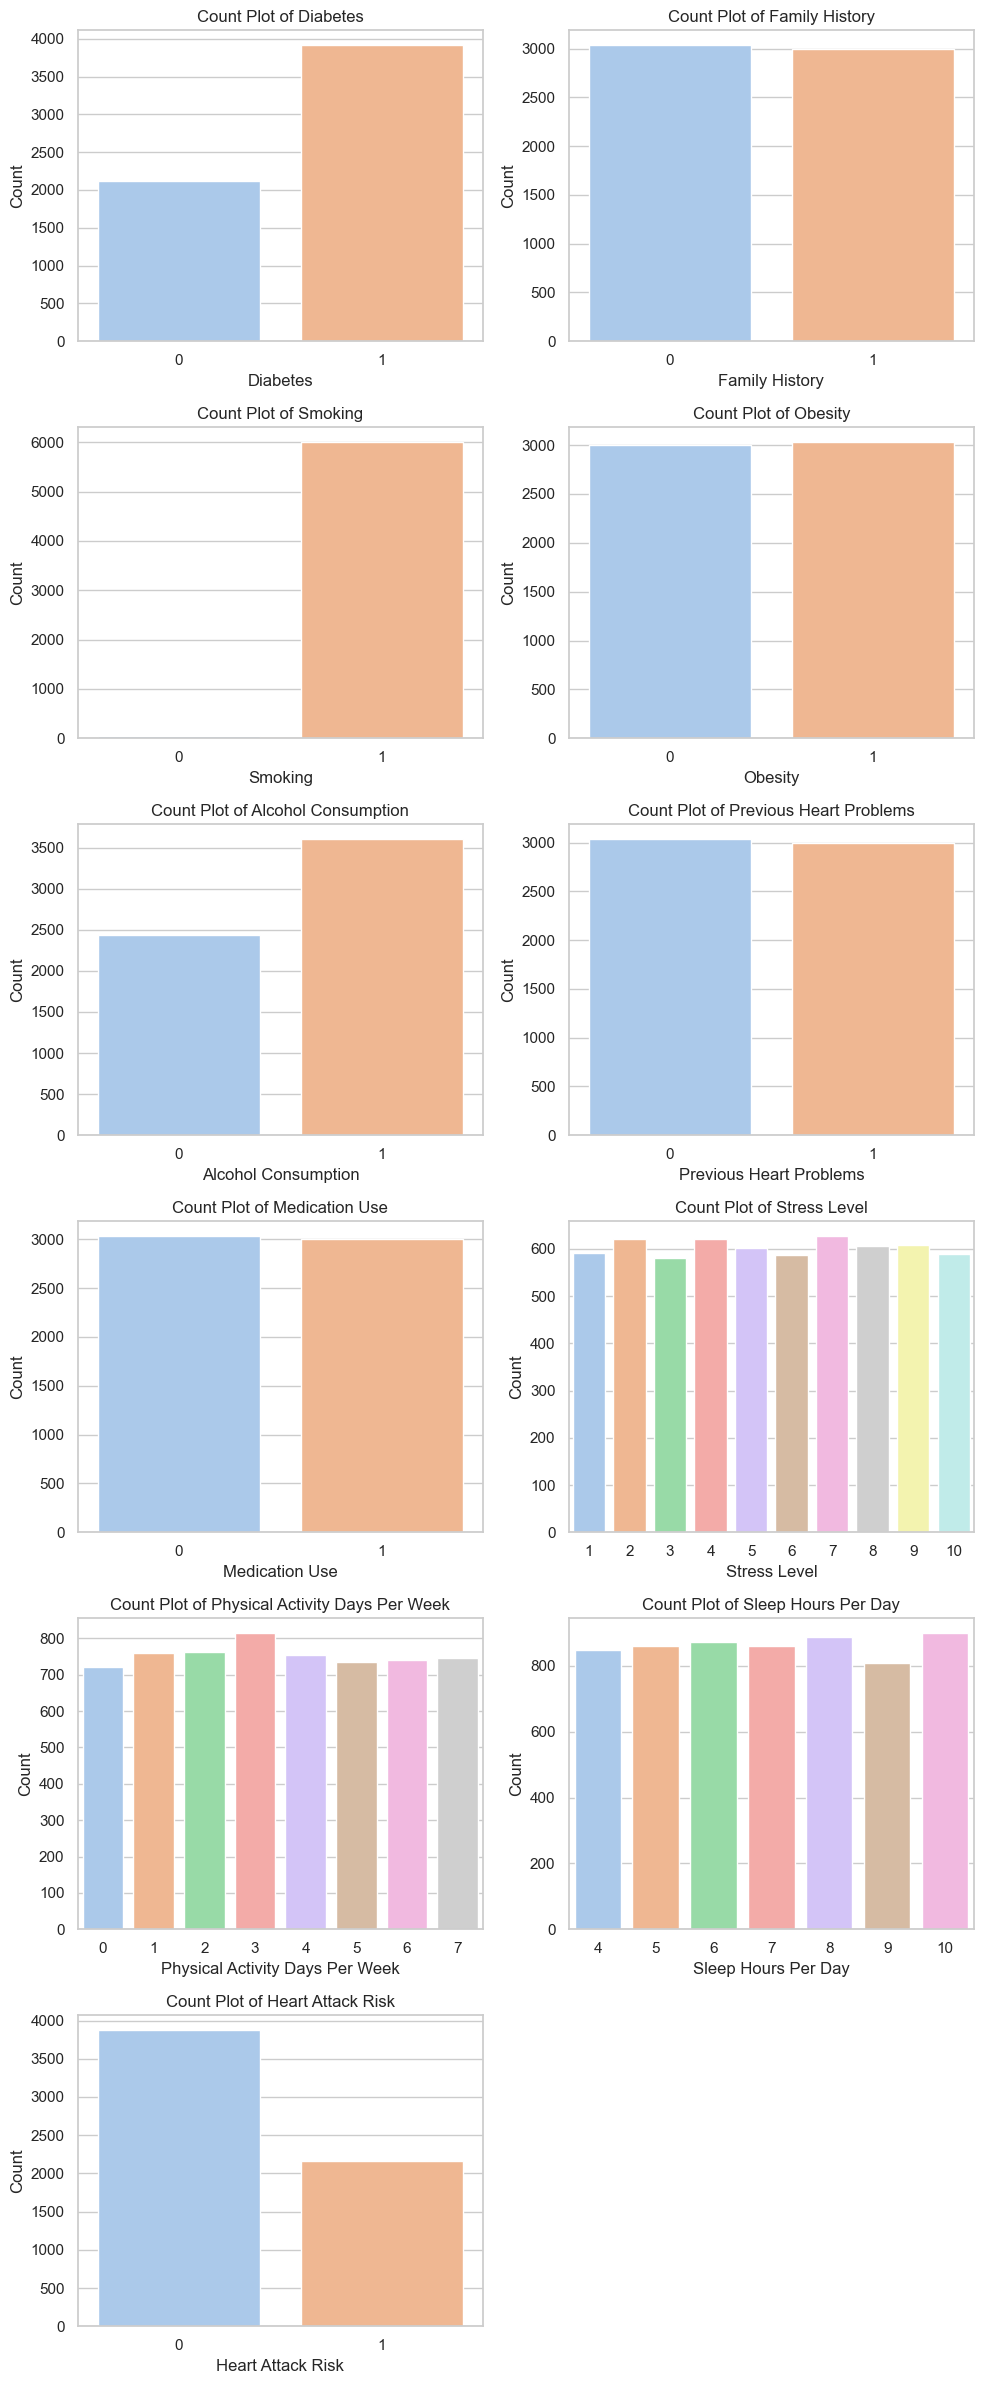

In [10]:
# features to explore
categorical_features = ['Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use',
                        'Stress Level', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Heart Attack Risk']

# Set the color palette for the plots
palette = sns.color_palette('pastel')

# plot 2 column grid
num_features = 11
rows = 6  # (num_features // 2) + (num_features % 2)
cols = 2  # Two plots per row

# creating a figure
plt.figure(figsize=(10, 4 * rows))

# Iterate through each categorical feature
for i, feature in enumerate(categorical_features):
    # Plotting the bar plot using a count plot with the specified palette
    plt.subplot(rows, cols, i + 1)
    sns.countplot(x=feature, data=data_v1, palette=palette)
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Smoking feature is useless as it has only one value 1. The other features are balanced. Only the target is slightly imbalanced.

In [11]:
data_v1.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere',
       'Heart Attack Risk', 'Systolic', 'Diastolic'],
      dtype='object')

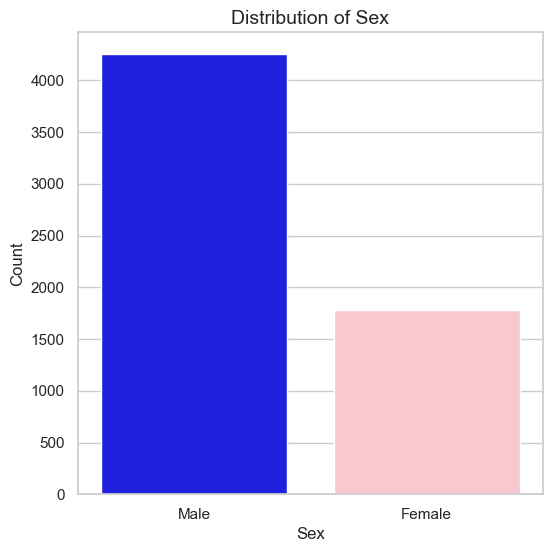

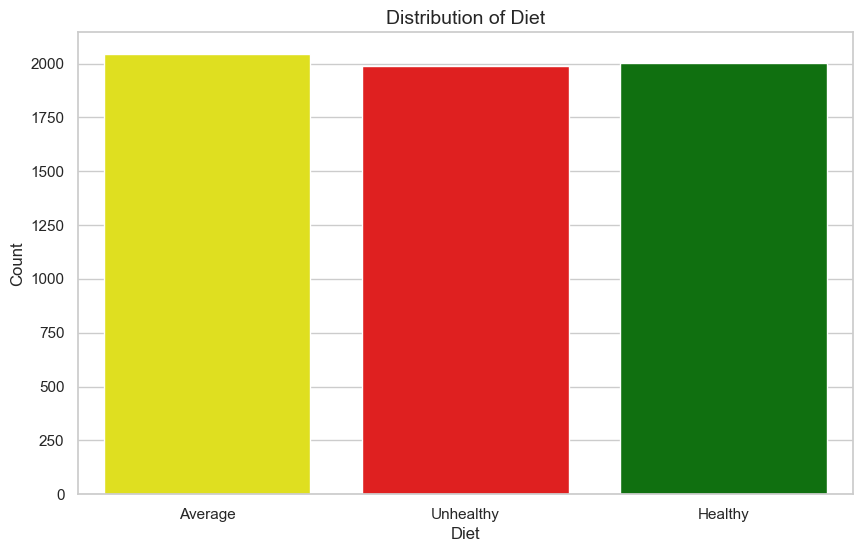

In [12]:
# Plot count plot for Sex variable
plt.figure(figsize=(6, 6))
sns.countplot(x='Sex', data=data_v1, palette={'Male': 'blue', 'Female': 'pink'})
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Sex', fontsize=14)
plt.show()

# Plot count plot for Diet variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Diet', data=data_v1, palette={'Healthy': 'green', 'Average': 'yellow', 'Unhealthy': 'red'})
plt.xlabel('Diet', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Diet', fontsize=14)
plt.show()

The distribution of Diet is balanced.

The male candidates constitude almost double observations of females.

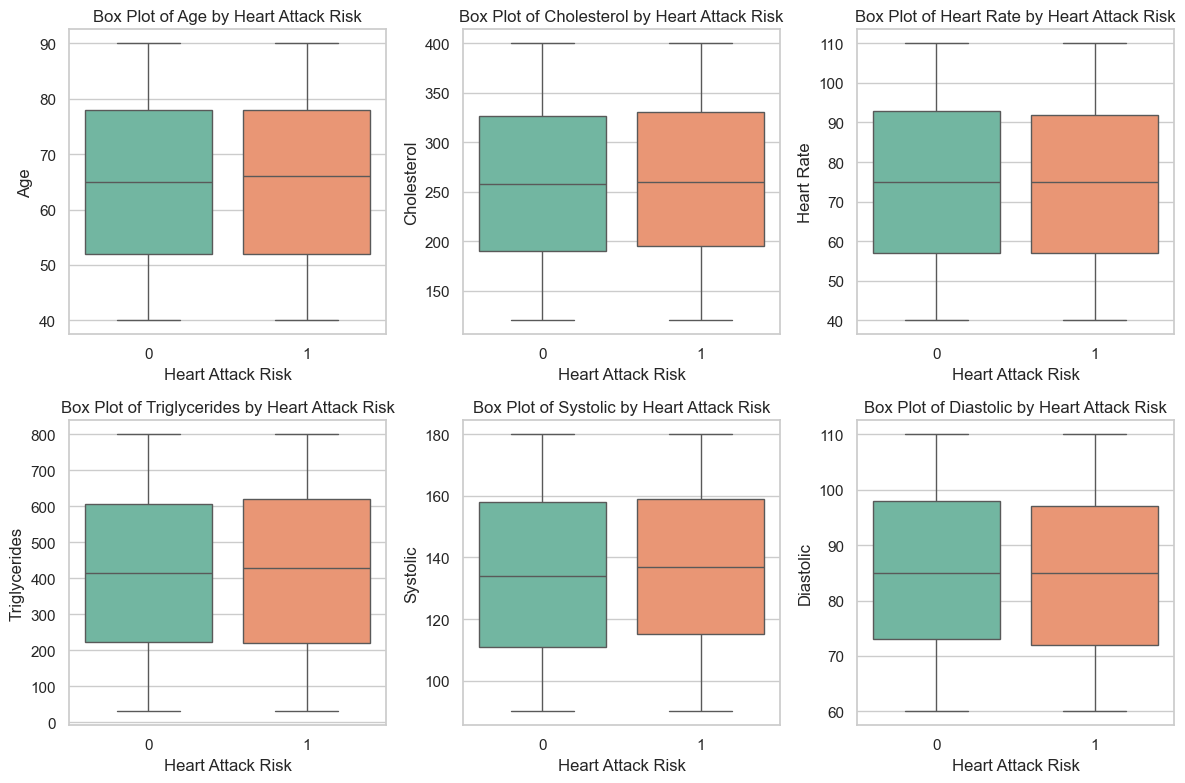

In [13]:
# Select variables for box plot analysis
boxplot_vars = ['Age', 'Cholesterol', 'Heart Rate', 'Triglycerides', 'Systolic', 'Diastolic']

# Create box plots for each variable
plt.figure(figsize=(12, 8))
for i, var in enumerate(boxplot_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Heart Attack Risk', y=var, data=data_v1, palette='Set2')
    plt.title(f'Box Plot of {var} by Heart Attack Risk')
    plt.xlabel('Heart Attack Risk')
    plt.ylabel(var)
plt.tight_layout()
plt.show()


Distributions are quite similar with or without heart attack, except that **age, Blood Pressure Systolic and Triglycerids** tends to be a little bit higher when there is a risk of heart attack.

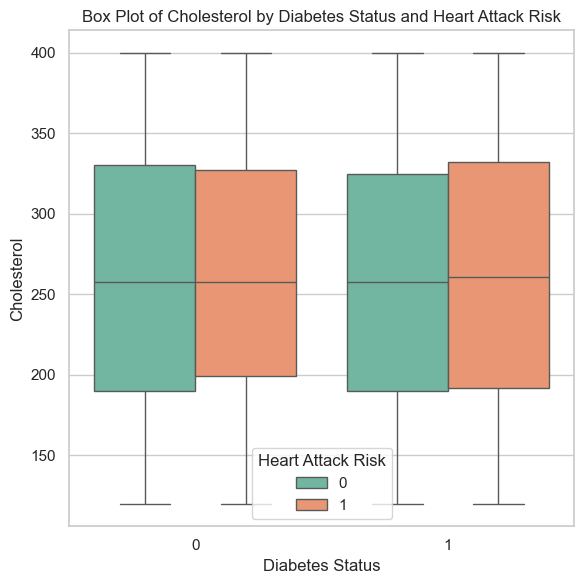

In [14]:
# Box Plot of Cholesterol grouped by Diabetes Status and Heart Attack Risk
plt.figure(figsize=(6, 6))
sns.boxplot(x='Diabetes', y='Cholesterol', hue='Heart Attack Risk', data=data_v1, palette='Set2')
plt.title('Box Plot of Cholesterol by Diabetes Status and Heart Attack Risk')
plt.xlabel('Diabetes Status')
plt.ylabel('Cholesterol')
plt.legend(title='Heart Attack Risk')
plt.tight_layout()
plt.show()

When there is diabbetes and heart attack risk, cholesterol level tends to be more.

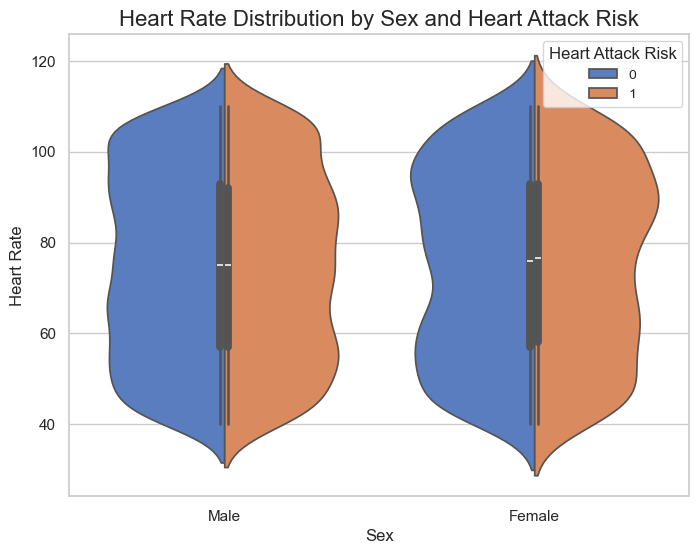

In [15]:
# Create the violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Sex", y="Heart Rate", hue="Heart Attack Risk", data=data_v1, palette="muted", split=True)
plt.title('Heart Rate Distribution by Sex and Heart Attack Risk', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Heart Rate', fontsize=12)
plt.legend(title='Heart Attack Risk', fontsize=10)
plt.show()

It suggests that there might be a significant difference in heart rate distribution between males and females, especially when considering the risk of heart attack. When there is heart attack rick, **Heart rate** tends to be higher for *Male* but lower for *female*.

#### Feature Engineering:

here, we engineer a new feature 'Sys-Dias' which is a fucntion of 'Diastolic' and 'Systolic'.

In [16]:
# make a new version of data
data_v2 = data_v1.copy()
data_v2['Sys-Dias'] = data_v2['Systolic'] - data_v2['Diastolic'] + data_v2['Diastolic']/data_v2['Systolic']

#### Encoding:

Let's encode the Diet and the Sex variables using ordinal encoding.

In [17]:
# Define the mapping
diet_mapping = {'Healthy': 3, 'Average': 2, 'Unhealthy': 1}
data_v2['Diet'] = data_v2['Diet'].map(diet_mapping)

# Apply ordinal encoding to the 'Sex' column
Sex_mapping = {'Male': 1, 'Female': 0}
data_v2['Sex'] = data_v2['Sex'].map(Sex_mapping)

#data_v2.head()

#### Correlation analysis:

In this section, we study the relationship between features and target using correlation matrix. We are going to draw correlation heatmap.

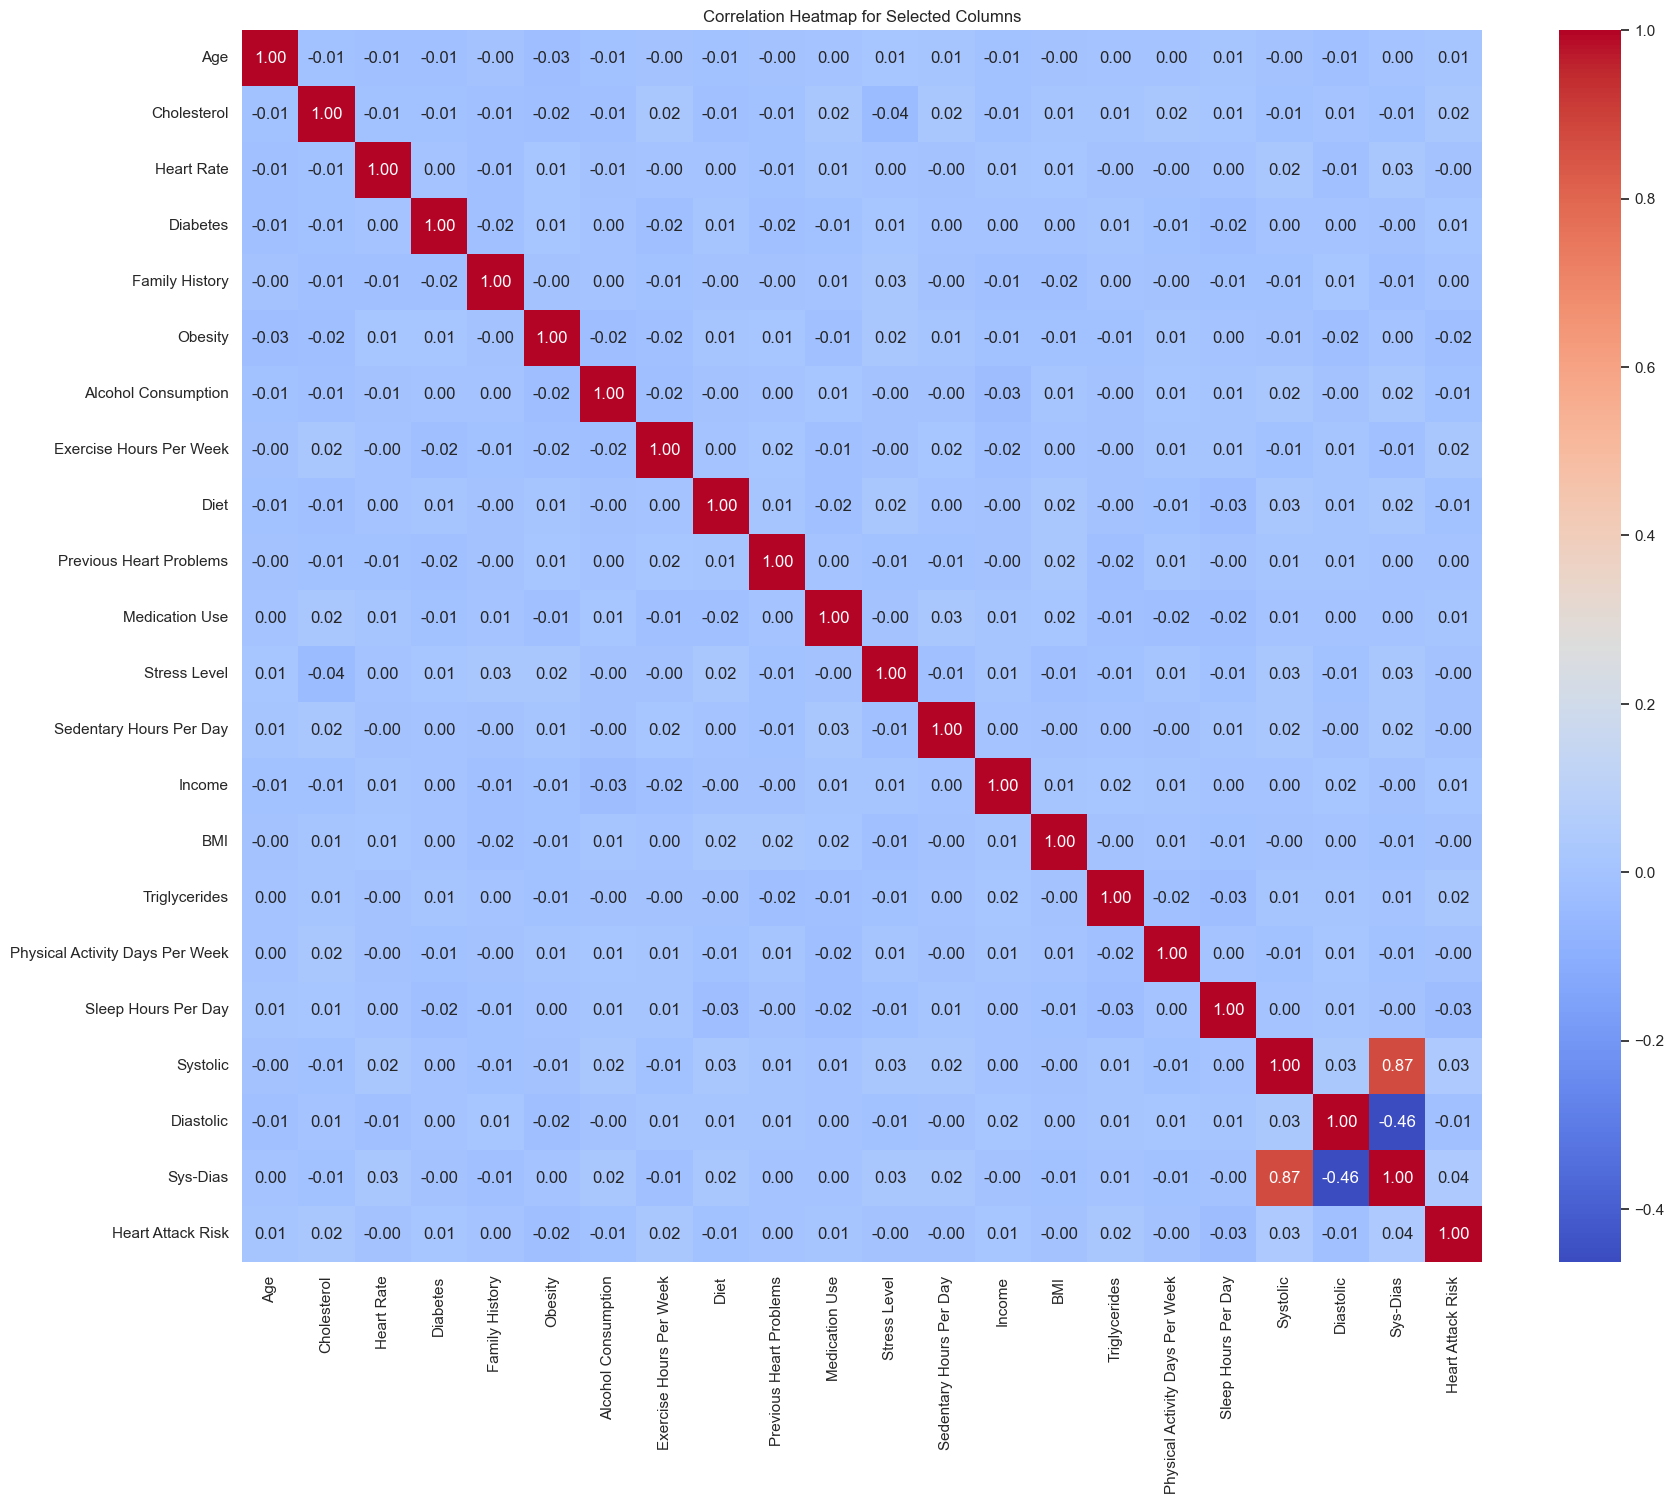

In [18]:
corr_matrix = data_v2[['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Obesity', 'Alcohol Consumption', 
                       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 
                       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day',
                       'Systolic', 'Diastolic', 'Sys-Dias', 'Heart Attack Risk']].corr()

# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Selected Columns')
plt.show()

There is not any high correlation between a feature and the target. This tells us that the job is not going to be easy for predictive models.

#### Feature Selection and Feature Scaling:

In this phase, we select features for modeling, next we scale the data using standard scaler, and then we split data into training and testing data. 

When sleecting features, we won't consider features with 0 correlation with the target, as they might have bad impact on the models.

In [19]:
data_v3 = data_v2[['Age', 'Cholesterol', 'Diabetes', 'Obesity', 'Exercise Hours Per Week', 'Triglycerides', 'Sleep Hours Per Day','Systolic', 
                   'Diastolic', 'Sys-Dias', 'Heart Attack Risk']]

In [20]:
# select features, and target
X = data_v3.drop('Heart Attack Risk', axis = 1)
y = data_v3['Heart Attack Risk']

# Undersample the majority class
undersampler = RandomUnderSampler(random_state=42)
X, y = undersampler.fit_resample(X, y)
print(y.value_counts())

# sleect columns with max value > 10 to standardize
columns_to_standardize = X.columns[X.max() > 10]

# apply standard scaler to the identified columns
scaler = StandardScaler()
X[columns_to_standardize] = scaler.fit_transform(X[columns_to_standardize])

# split data into training and testing | 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) 

# display shapes of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Heart Attack Risk
0    2163
1    2163
Name: count, dtype: int64
Shape of X_train: (3460, 10)
Shape of X_test: (866, 10)
Shape of y_train: (3460,)
Shape of y_test: (866,)


In [21]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from collections import Counter

# Check class distribution before undersampling
print("Class distribution before undersampling:", Counter(y))

undersampler = RandomUnderSampler(random_state=42)

# Undersample the majority class
X, y = undersampler.fit_resample(X, y)

# Check class distribution before undersampling
print("Class distribution before undersampling:", Counter(y))

#X_train = X_train_resampled.copy()
#y_train = y_train_resampled.copy()

Class distribution before undersampling: Counter({0: 2163, 1: 2163})
Class distribution before undersampling: Counter({0: 2163, 1: 2163})


#### Building Predictive Models:

In this section, we present different predictive models with performance evaluations. We will start by training different models with default hyper-parameters and evaluating them on the testing data using accuracy score.

In [22]:
models = {
    'Naive Bayes': GaussianNB(),  
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),      
    'MLP Neural Network': MLPClassifier() 
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

Training Naive Bayes...
Naive Bayes Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.51      0.50      0.51       439
           1       0.50      0.52      0.51       427

    accuracy                           0.51       866
   macro avg       0.51      0.51      0.51       866
weighted avg       0.51      0.51      0.51       866

Training Logistic Regression...
Logistic Regression Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.52      0.49      0.50       439
           1       0.50      0.54      0.52       427

    accuracy                           0.51       866
   macro avg       0.51      0.51      0.51       866
weighted avg       0.51      0.51      0.51       866

Training SVM...
SVM Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.53      0.43      0.47       439
           1       0.51      0.60      0.55       427

    accuracy                 

Based on the information above, we will choose 4 to 5 models to go on with. **Logistic Regression, SVM, Random forest, KNN, and MLP** are the options.

#### 1. Logistic Regression:

Here, we train Logistic Regression and tune the hyper-parameters to achieve the best possible accuracy without ignoring f1 score. Grid Search will be used to tune the hyper-parameter **C**.

In [23]:
lr_param_grid = { 'C': [0.0001, 0.001, 0.002, 0.005, 0.01, 1] } 

lr_grid_search = GridSearchCV(estimator=LogisticRegression(penalty='l2'), param_grid=lr_param_grid, cv=5, scoring = 'accuracy')

lr_grid_search.fit(X_train, y_train)
# print the best hyperparameter
print("Best Hyperparameters:", lr_grid_search.best_params_)

Best Hyperparameters: {'C': 0.002}


Accuracy: 53.46%
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.51      0.53       439
           1       0.53      0.56      0.54       427

    accuracy                           0.53       866
   macro avg       0.54      0.54      0.53       866
weighted avg       0.54      0.53      0.53       866


Coefficients:
 [[ 7.98341632e-05  5.58138740e-02  2.94631744e-02 -2.88126833e-02
   1.91619753e-02  7.17826597e-03 -2.51696721e-02  2.82562859e-02
  -3.06653446e-02  3.98203034e-02]]


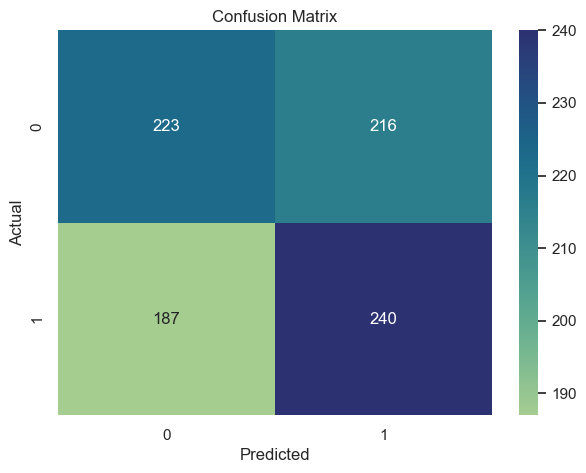

In [24]:
# train and fit logistic regression with the best parameter for C
lr = LogisticRegression(penalty='l2', C = 0.002)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# evaluate model performance
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# print the coefficients
print("\nCoefficients:\n", lr.coef_)

# Define a custom color palette
cm_palette = sns.color_palette("crest", as_cmap=True)

# Plot confusion matrix heatmap
lr_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(lr_cm, annot=True, cmap=cm_palette, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The best achievable accuracy for **logistic regression** with *regularization L2* is 53.46%.

#### 2. Support Vector Machine:

Here, we train **Support Vector Classifier** and tune the hyper-parameters to achieve the *best* possible accuracy. **Grid Search** will be used to tune the hyper-parameter C.

In [25]:
svm_param_grid = {
    'C': [0.0005, 0.001, 0.005],
    'kernel': ['linear', 'rbf', 'poly']
}

svm_grid_search = GridSearchCV(estimator=SVC(), param_grid=svm_param_grid, cv=5, scoring='accuracy')

svm_grid_search.fit(X_train, y_train)

# print the best hyperparameters
print("Best Hyperparameters:", svm_grid_search.best_params_)

Best Hyperparameters: {'C': 0.005, 'kernel': 'linear'}


Accuracy: 52.89%
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.49      0.51       439
           1       0.52      0.57      0.54       427

    accuracy                           0.53       866
   macro avg       0.53      0.53      0.53       866
weighted avg       0.53      0.53      0.53       866



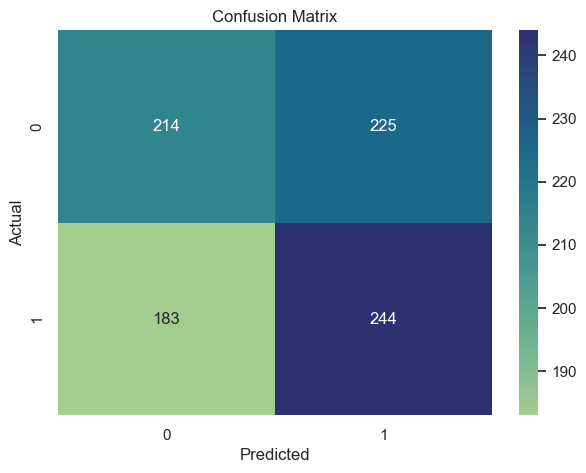

In [26]:
# train and fit logistic regression with the best parameter for C
svc = SVC(kernel='linear', C=0.005)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

# evaluate model performance
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


# Define a custom color palette
cm_palette = sns.color_palette("crest", as_cmap=True)

# Plot confusion matrix heatmap
svc_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(svc_cm, annot=True, cmap=cm_palette, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

So, the best accuracy for SVM is 52.89% with very low C value to avoid overfitting.

#### 3. Random Forest:

Here, we build and train a **Random Forest Classifier**, and tune the parameters to get the best performnce based on accuracy. Grid Search will be used again.

In [27]:
param_grid_rf = {
    'n_estimators': [50, 52, 55, 60, 75, 100, 150],
    'max_depth': [5, 7, 9]
}
rf_classifier = RandomForestClassifier(random_state=0)

# grid search using 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

Best Parameters for Random Forest: {'max_depth': 5, 'n_estimators': 52}


Random Forest Accuracy: 51.50%
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.46      0.49       439
           1       0.51      0.57      0.54       427

    accuracy                           0.52       866
   macro avg       0.52      0.52      0.51       866
weighted avg       0.52      0.52      0.51       866



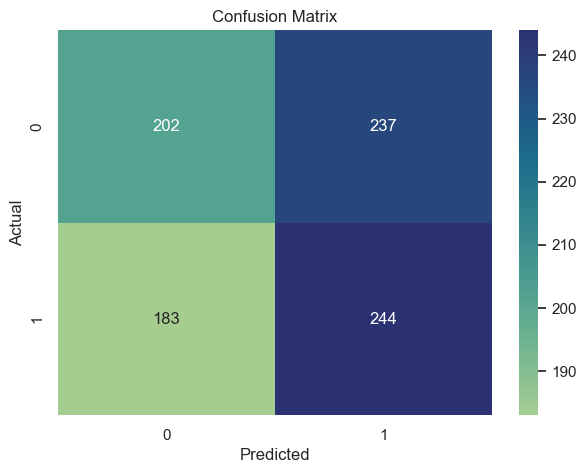

In [28]:
# build random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=52, max_depth=5, random_state=0)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

# evaluate model performance
print("Random Forest Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_rf) * 100))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Define a custom color palette
cm_palette = sns.color_palette("crest", as_cmap=True)

# Plot confusion matrix heatmap
rf_cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(7, 5))
sns.heatmap(rf_cm, annot=True, cmap=cm_palette, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

So, the best accuracy for **Random Forest** after *tuning the Hyper-parameters* is 51.50%.

#### 4. K-Nearest Neighbours:

Now, we train **K-nearest neighbour** model and we tune the hyper parameters to get the best accurracy.

In [29]:
param_grid_knn = {
    'n_neighbors': [30, 40, 50, 65, 75, 80, 100]
}
knn = KNeighborsClassifier(metric = 'manhattan')
#  grid search with cross-validation
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and best accuracy
print("Best Parameters:", grid_search_knn.best_params_)

Best Parameters: {'n_neighbors': 75}


kNN Accuracy: 51.27%
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.49      0.50       439
           1       0.51      0.54      0.52       427

    accuracy                           0.51       866
   macro avg       0.51      0.51      0.51       866
weighted avg       0.51      0.51      0.51       866



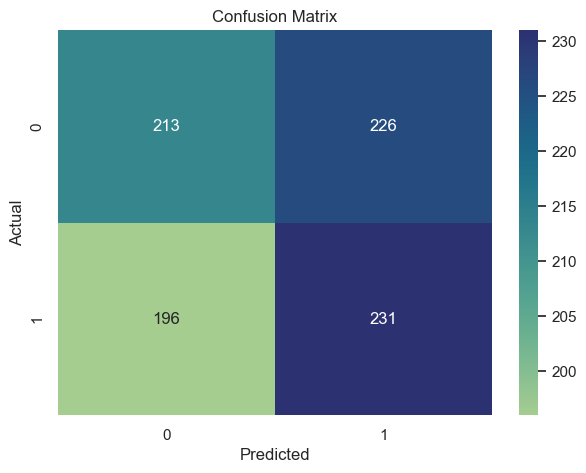

In [30]:
# build kNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=75, metric='manhattan')
knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)

# evaluate model performance
print("kNN Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_knn) * 100))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Define a custom color palette
cm_palette = sns.color_palette("crest", as_cmap=True)

# Plot confusion matrix heatmap
knn_cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(7, 5))
sns.heatmap(knn_cm, annot=True, cmap=cm_palette, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

So, the best accuracy obtained after tuing the parameters is 51.27%.

#### 5. Neural Networks and Deep Learning:

Last model is **MLP Classifier**. we will use custom hyper-parameters obtained after training, evaluating and improving different hyper-parameters.

In [31]:
# train MLP classifier with custom hyper parameters
mlp = MLPClassifier(random_state=0, hidden_layer_sizes=(100, 50, 25), activation='relu', solver='sgd', alpha=0.001)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

# evaluate model performance
print("Neural Networks Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Classification Report:\n", classification_report(y_test, y_pred))

Neural Networks Accuracy: 53.00%
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.51      0.52       439
           1       0.52      0.55      0.54       427

    accuracy                           0.53       866
   macro avg       0.53      0.53      0.53       866
weighted avg       0.53      0.53      0.53       866



With deep learning model we got 53% accuracy with 53% for f1 score and precision as well.

#### Conclusion:

Our analysis of **Heart Attack Risk Prediction for Elderly** involved a similar methodology to that of the Heart Disease Risk dataset. However, due to the availability of sufficient data, we set a minimum age threshold of 40, resulting in a dataset with more observations.

One of the primary challenges encountered was the lack of strong correlations between the features and the target variable. To address this, we carefully selected features with higher correlations with the target variable, ensuring that our models were built on the most relevant information available.

Additionally, to counteract class imbalance, we applied undersampling techniques, balancing the distribution of the target variable in the dataset. Despite these efforts, the predictive models achieved a modest accuracy of 53.5% on the testing data.

We explored and tuned five different models, including Logistic Regression, SVM, Random Forest, KNN, and MLP Classifier. Despite the comprehensive modeling approach, the accuracy achieved fell short of expectations, indicating the complexity and nuance of predicting heart attack risk based on the available features.

While the results may not have met our initial expectations, the insights gained from this analysis contribute to our understanding of heart attack risk prediction and highlight areas for further investigation and improvement. Continued research and refinement of modeling techniques hold the potential to enhance predictive accuracy and ultimately contribute to better outcomes in healthcare and risk management.